# Dynamics Figures

These are a collection of figures for my PhD thesis.
The naming of the figures will remain consistent throughout and the ordering of the figures should be roughly the same as in the thesis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Make dealing with filesystem paths much, much simpler
from pathlib import Path

# Read/write data files and data analysis
import pandas
import numpy as np

import altair.vegalite.v2 as alt
# import altair as alt
alt.data_transformers.enable('csv')

import sys
sys.path.append("../src")
import figures

alt.themes.register("my_theme", figures.my_theme)
alt.themes.enable("my_theme")

ThemeRegistry.enable('my_theme')

This notebook generates a collection of figures which are exported as pdf files to the `../figures/thesis` directory.
To prevent the figures from being saved, only outputting the resulting files to this notebook
you can set the `save_figures` variable to `False`.

In [29]:
save_figures = True
# save_figures = False

## Datasets

The datasets used for the generation of these figures are found in the `../data/analysis` directory,
with the `dynamics.h5` file containing all the dynamics results in 3 tables

- `dynamics` -> containing the standard raw dynamics quantities including the mean-squared-displacement, structural relaxation, and many others. 
    These values include each of these quantities for a number of starting configurations, allowing for the calculation of errors for these quantities.
    For a full list of the available quantities see the [dynamics_interactive notebook](01_dynamics_interactive.ipynb).
- `molecular_relaxations` -> containing the molecular relaxation values for each of the molecules 
    allowing comparisons between quantities for a single molecule.
- `relaxations` -> containing the aggregated relaxation value for each of the quantities in the `dynamics` and `molecular_relaxations` tables. 
    All these values can be investigated in the [relaxations_interactive notebook](02_relaxations_interactive.ipynb)


In [30]:
# Where the data files with the results are located
data_dir = Path('../data/analysis')

# Load data for most of the figures
dynamics_df = pandas.read_hdf(data_dir / 'dynamics_clean_agg.h5', 'dynamics')

dynamics_df = dynamics_df.query("pressure == 13.50")

# Output path for all figures
figure_dir = Path("../figures/thesis")
# Ensure the directory exists
figure_dir.mkdir(exist_ok=True)

## Normalisation by Melting Point

The dynamics of many quantities are plotted as a fraction of the melting point,
this creates a column in the data frames with this normalised temperature.

In [31]:
dynamics_df['temp_norm'] = 0

select_high_pressure = (dynamics_df.pressure == 13.50).values
dynamics_df.loc[select_high_pressure, 'temp_norm'] = 1.35 / dynamics_df.loc[select_high_pressure, 'pressure']

select_low_pressure = (dynamics_df.pressure == 1.00).values
dynamics_df.loc[select_low_pressure, 'temp_norm'] = 0.36 / dynamics_df.loc[select_low_pressure, 'pressure']

In [32]:
dynamics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 4242 to 10226
Data columns (total 40 columns):
temperature                  5386 non-null float64
pressure                     5386 non-null float64
time                         5386 non-null int64
alpha_value                  5386 non-null float64
alpha_lower                  5386 non-null float64
alpha_upper                  5386 non-null float64
com_struct_value             5386 non-null float64
com_struct_lower             5386 non-null float64
com_struct_upper             5386 non-null float64
gamma_value                  5386 non-null float64
gamma_lower                  5386 non-null float64
gamma_upper                  5386 non-null float64
mean_displacement_value      5386 non-null float64
mean_displacement_lower      5386 non-null float64
mean_displacement_upper      5386 non-null float64
mean_rotation_value          5386 non-null float64
mean_rotation_lower          5386 non-null float64
mean_rotation_upper     

## Comparative Dynamics

These are a collection of dynamics quantities to establish that the system we are dealing with has behaviour that more or less aligns with much of the literature.

In [33]:
from figures import plot_dynamics

### Mean Squared Displacement

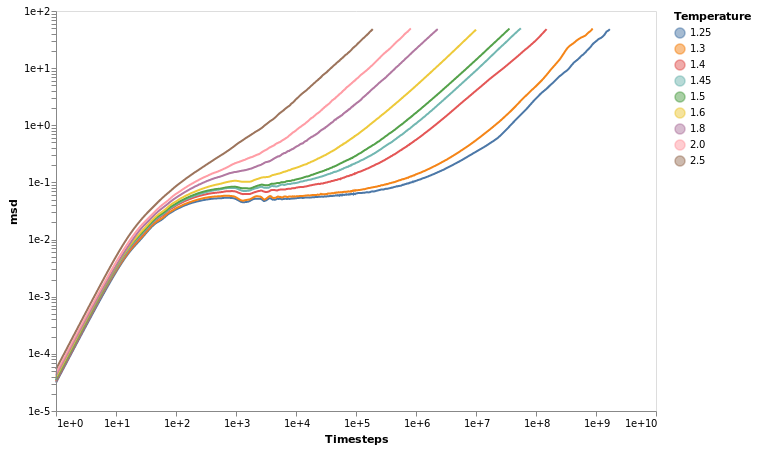

In [34]:
c = plot_dynamics(dynamics_df, 'msd', scale='log')

if save_figures:
    c.save(str(figure_dir / "mean_squared_displacement.svg"), webdriver='firefox')
    
c

## Non-gaussian 

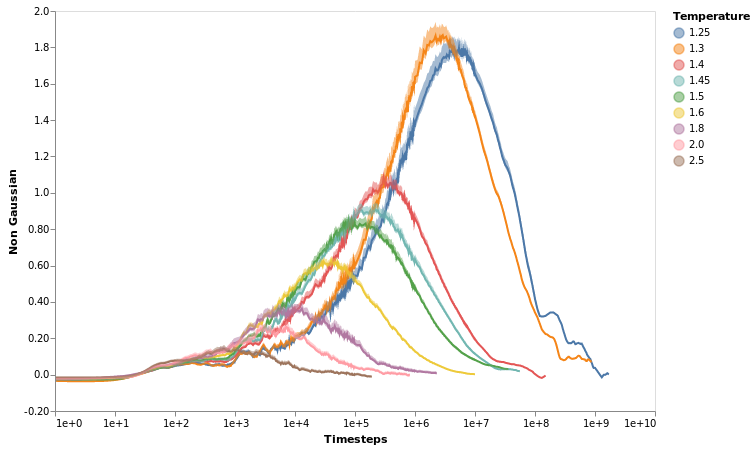

In [35]:
c = plot_dynamics(dynamics_df, 'alpha', title="Non Gaussian")

if save_figures:
    c.save(str(figure_dir / "non_gaussian.svg"), webdriver='firefox')
    
c

## Structural Relaxation

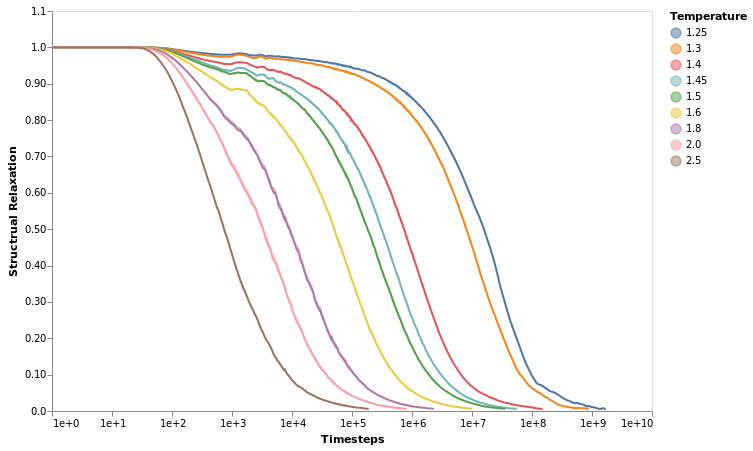

In [36]:
c = plot_dynamics(dynamics_df, 'struct', title="Structrual Relaxation")

if save_figures:
    c.save(str(figure_dir / "structural_relaxation.svg"), webdriver='firefox')
    
c

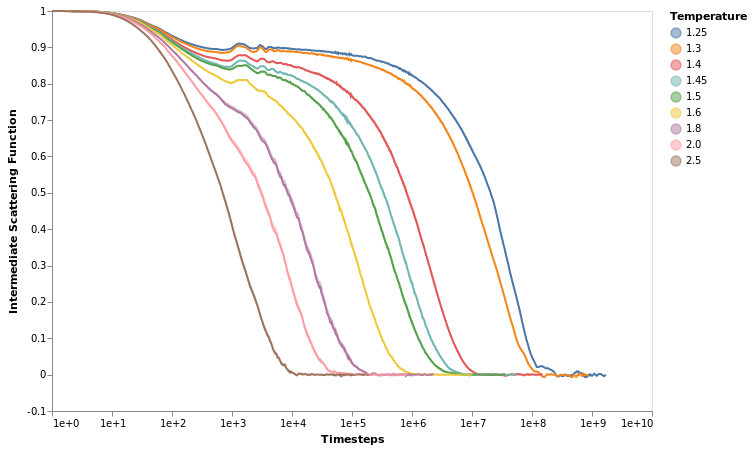

In [37]:
c = plot_dynamics(dynamics_df, 'scattering_function', title="Intermediate Scattering Function")

if save_figures:
    c.save(str(figure_dir / "scattering_function.svg"), webdriver='firefox')
    
c

## Rotational Relaxation

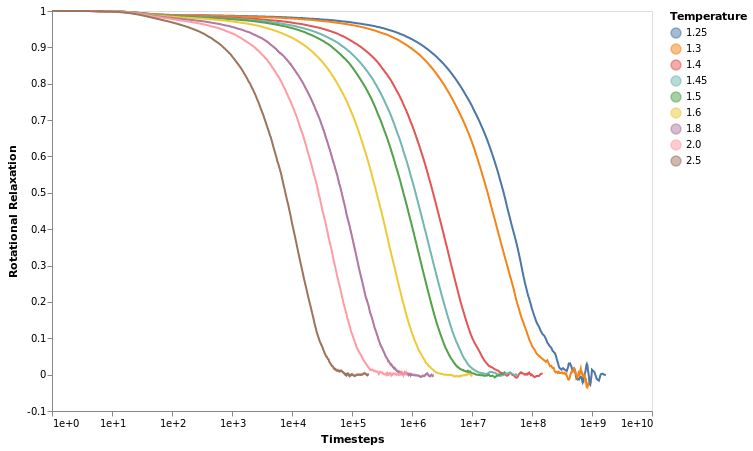

In [38]:
c = plot_dynamics(dynamics_df, 'rot2', title="Rotational Relaxation")

if save_figures:
    c.save(str(figure_dir / "rotational_relaxtion.svg"), webdriver='firefox')
    
c

## Relaxation Quantities

In [39]:
relaxations_df = pandas.read_hdf(data_dir / "dynamics_clean_agg.h5", "relaxations")
# relaxations_df = relaxations_df.query("pressure == 13.50")
mask = relaxations_df.pressure == 13.50
t_melting_high = 1.35
t_melting_low = 0.35
relaxations_df['inv_temp'] = 0.
relaxations_df.loc[mask, 'inv_temp'] = t_melting_high / relaxations_df.temperature
relaxations_df.loc[~mask, 'inv_temp'] = t_melting_low / relaxations_df.temperature
relaxations_df[relaxations_df < 0] = np.NaN

# relaxations_df['inv_diffusion'] = 1 / relaxations_df.diffusion_constant

In [40]:
from figures import plot_relaxations

In [41]:
relaxations_df.head()

,temperature,pressure,alpha_value,alpha_lower,alpha_upper,com_struct_value,com_struct_lower,com_struct_upper,gamma_value,gamma_lower,...,scattering_function_value,scattering_function_lower,scattering_function_upper,struct_value,struct_lower,struct_upper,inv_diffusion_value,inv_diffusion_lower,inv_diffusion_upper,inv_temp
0,0.30,1.0,66795200.00,6.546586e+07,7.004766e+07,2.237368e+09,2.232130e+09,2.248792e+09,16720467.60,1.583292e+07,...,1.699561e+09,1.697304e+09,1.705040e+09,1.210587e+09,1.208914e+09,1.215263e+09,NaN,NaN,NaN,1.166667
1,0.35,1.0,1603743.00,1.542180e+06,1.771295e+06,1.177403e+07,1.160970e+07,1.216833e+07,302072.80,2.874710e+05,...,7.351188e+06,7.248290e+06,7.597276e+06,6.208275e+06,6.123809e+06,6.421999e+06,7.681802e+06,7.676321e+06,7.694756e+06,1.000000
2,0.40,1.0,102801.60,9.815619e+04,1.156124e+05,3.253789e+05,3.205493e+05,3.360890e+05,33168.52,3.209996e+04,...,2.084230e+05,2.059192e+05,2.147445e+05,2.078013e+05,2.056431e+05,2.132640e+05,4.166666e+05,4.151250e+05,4.205862e+05,0.875000
3,0.45,1.0,24509.82,2.348211e+04,2.742260e+04,4.382138e+04,4.329588e+04,4.512355e+04,10739.14,1.034119e+04,...,2.757917e+04,2.721639e+04,2.840948e+04,3.012708e+04,2.977969e+04,3.098275e+04,6.636350e+04,6.612254e+04,6.693036e+04,0.777778
4,0.50,1.0,11941.18,1.140823e+04,1.337182e+04,1.212512e+04,1.199190e+04,1.243743e+04,4845.56,4.669545e+03,...,7.397246e+03,7.311484e+03,7.603412e+03,8.536787e+03,8.447947e+03,8.746339e+03,2.071206e+04,2.062533e+04,2.091218e+04,0.700000


In [42]:
relaxations_df.columns

Index(['temperature', 'pressure', 'alpha_value', 'alpha_lower', 'alpha_upper',
       'com_struct_value', 'com_struct_lower', 'com_struct_upper',
       'gamma_value', 'gamma_lower', 'gamma_upper', 'mean_displacement_value',
       'mean_displacement_lower', 'mean_displacement_upper',
       'mean_rotation_value', 'mean_rotation_lower', 'mean_rotation_upper',
       'mfd_value', 'mfd_lower', 'mfd_upper', 'msd_value', 'msd_lower',
       'msd_upper', 'overlap_value', 'overlap_lower', 'overlap_upper',
       'rot1_value', 'rot1_lower', 'rot1_upper', 'rot2_value', 'rot2_lower',
       'rot2_upper', 'scattering_function_value', 'scattering_function_lower',
       'scattering_function_upper', 'struct_value', 'struct_lower',
       'struct_upper', 'inv_diffusion_value', 'inv_diffusion_lower',
       'inv_diffusion_upper', 'inv_temp'],
      dtype='object')

### Scattering Function

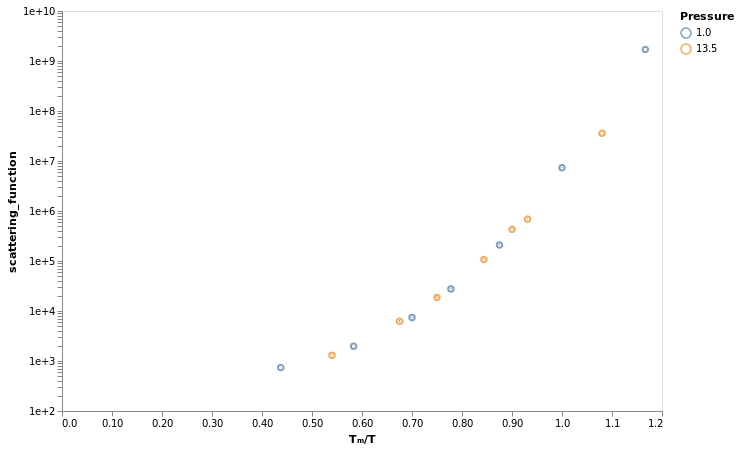

In [43]:
plot_relaxations(relaxations_df, 'scattering_function')

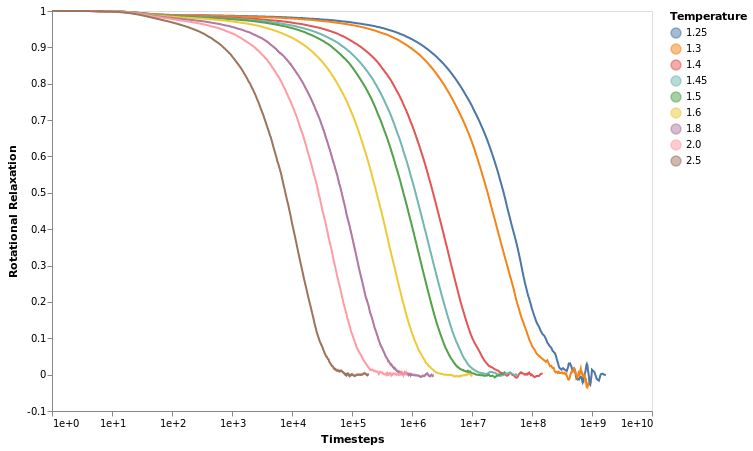

In [44]:
plot_relaxations(relaxations_df, 'struct', title="Structural Relaxation")

if save_figures:
    c.save(str(figure_dir / "isf_relaxation.svg"), webdriver='firefox')
    
c

### Diffusion

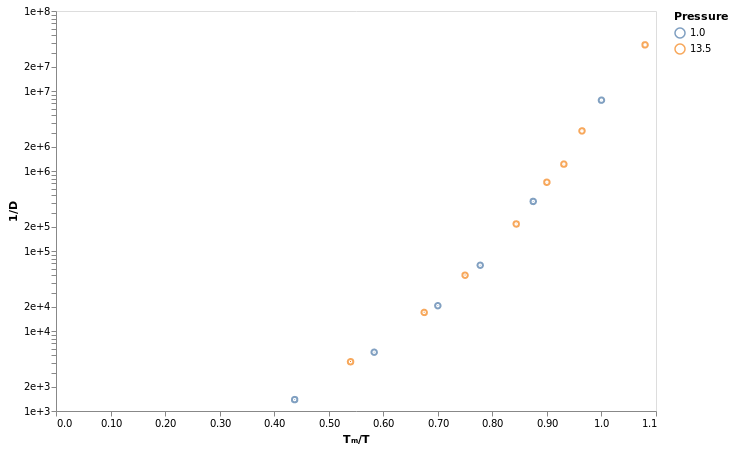

In [45]:
c = plot_relaxations(relaxations_df, 'inv_diffusion', title="1/D")

if save_figures:
    c.save(str(figure_dir / "diffusion_constant.svg"), webdriver='firefox')
    
c

### Rotational Relaxation

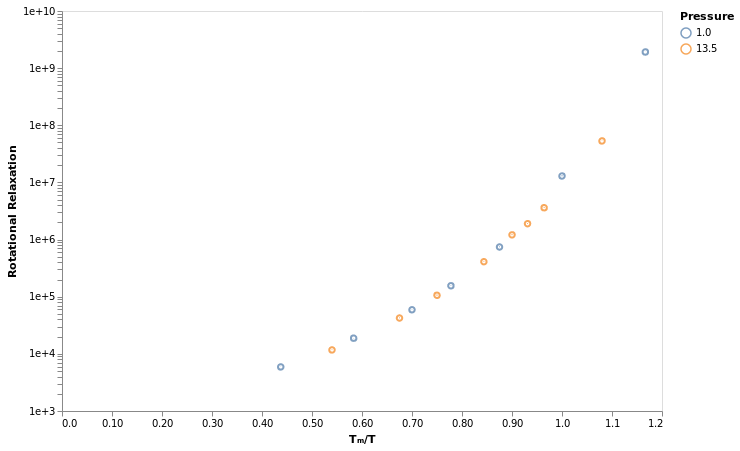

In [46]:
c = plot_relaxations(relaxations_df, 'rot2', title="Rotational Relaxation")

if save_figures:
    c.save(str(figure_dir / "rotational_relaxation.svg"), webdriver='firefox')
    
c

## Molecular Relaxations

In [47]:
mol_df = pandas.read_hdf(data_dir / "dynamics_clean_agg.h5", "molecular_relaxations")

mask = mol_df.pressure == 13.50
t_melting_high = 1.35
t_melting_low = 0.35
mol_df['inv_temp'] = 0.
mol_df.loc[mask, 'inv_temp'] = t_melting_high / mol_df.temperature
mol_df.loc[~mask, 'inv_temp'] = t_melting_low / mol_df.temperature

In [48]:
relax_df = relaxations_df.set_index(['temperature', 'pressure', 'inv_temp']).join(
    mol_df.set_index(['temperature', 'pressure', 'inv_temp'])
).reset_index()

In [49]:
from figures import reshape_dataframe, plot_multi_relaxations

In [50]:
mol_df

,temperature,pressure,tau_D_value,tau_D_lower,tau_D_upper,tau_F_value,tau_F_lower,tau_F_upper,tau_L_value,tau_L_lower,...,tau_T2_value,tau_T2_lower,tau_T2_upper,tau_T3_value,tau_T3_lower,tau_T3_upper,tau_T4_value,tau_T4_lower,tau_T4_upper,inv_temp
0,0.35,1.0,3.085783e+07,3.071129e+07,3.119863e+07,1.209969e+07,1.202350e+07,1.229921e+07,3.373448e+07,3.362278e+07,...,3.702249e+07,3.690631e+07,3.727458e+07,2.200322e+07,2.190706e+07,2.223380e+07,1.663923e+07,1.653561e+07,1.687627e+07,1.000000
1,0.40,1.0,1.142664e+06,1.133726e+06,1.163000e+06,6.221132e+05,6.179598e+05,6.311272e+05,3.009164e+06,3.000583e+06,...,3.242713e+06,3.232243e+06,3.264362e+06,1.623369e+06,1.616772e+06,1.639358e+06,1.041050e+06,1.035954e+06,1.053677e+06,0.875000
2,0.45,1.0,1.669244e+05,1.659080e+05,1.694254e+05,1.182998e+05,1.178250e+05,1.195218e+05,7.323312e+05,7.310113e+05,...,7.866281e+05,7.853606e+05,7.899295e+05,3.617789e+05,3.608773e+05,3.638794e+05,2.161387e+05,2.154233e+05,2.176779e+05,0.777778
3,0.50,1.0,5.040912e+04,5.019641e+04,5.097516e+04,4.231347e+04,4.220713e+04,4.260229e+04,2.947852e+05,2.942982e+05,...,3.151863e+05,3.147601e+05,3.163042e+05,1.427488e+05,1.425180e+05,1.433667e+05,8.198244e+04,8.180771e+04,8.244631e+04,0.700000
4,0.60,1.0,1.398568e+04,1.393414e+04,1.410202e+04,1.343439e+04,1.341157e+04,1.349173e+04,9.842343e+04,9.828432e+04,...,1.055984e+05,1.054658e+05,1.059091e+05,4.644343e+04,4.637782e+04,4.660316e+04,2.616167e+04,2.612024e+04,2.626074e+04,0.583333
5,0.80,1.0,4.699930e+03,4.688781e+03,4.726251e+03,4.430105e+03,4.423969e+03,4.446325e+03,3.130176e+04,3.126039e+04,...,3.373927e+04,3.370284e+04,3.384010e+04,1.519614e+04,1.517971e+04,1.523930e+04,8.614323e+03,8.602957e+03,8.640421e+03,0.437500
6,1.00,1.0,2.705164e+03,2.665014e+03,2.807682e+03,2.404080e+03,2.372595e+03,2.484868e+03,1.557486e+04,1.544161e+04,...,1.692157e+04,1.677234e+04,1.730921e+04,7.718042e+03,7.635339e+03,7.926949e+03,4.462649e+03,4.412276e+03,4.592968e+03,0.350000
7,1.25,13.5,1.287522e+08,1.283287e+08,1.297407e+08,5.080730e+07,5.071339e+07,5.104174e+07,1.490819e+08,1.489368e+08,...,1.675058e+08,1.673531e+08,1.679067e+08,1.024417e+08,1.023425e+08,1.026907e+08,7.590464e+07,7.579943e+07,7.614348e+07,1.080000
8,1.30,13.5,7.632866e+07,7.607403e+07,7.699213e+07,2.821360e+07,2.814175e+07,2.840464e+07,7.822777e+07,7.804638e+07,...,8.937603e+07,8.915739e+07,8.989496e+07,5.640120e+07,5.624174e+07,5.676276e+07,4.209598e+07,4.198162e+07,4.235905e+07,1.038462
9,1.40,1.0,1.511681e+03,1.491369e+03,1.561165e+03,1.276218e+03,1.263071e+03,1.310233e+03,6.995668e+03,6.948251e+03,...,7.720560e+03,7.667635e+03,7.860651e+03,3.642644e+03,3.609082e+03,3.727855e+03,2.223383e+03,2.199505e+03,2.280805e+03,0.250000


In [51]:
melt_df = reshape_dataframe(relax_df)

In [52]:
melt_df.variable.unique()

array(['alpha', 'com_struct', 'gamma', 'mean_displacement',
       'mean_rotation', 'rot1', 'rot2', 'scattering_function', 'struct',
       'inv_diffusion', 'msd', 'tau_D', 'tau_F', 'tau_L', 'tau_T2',
       'tau_T3', 'tau_T4', 'mfd'], dtype=object)

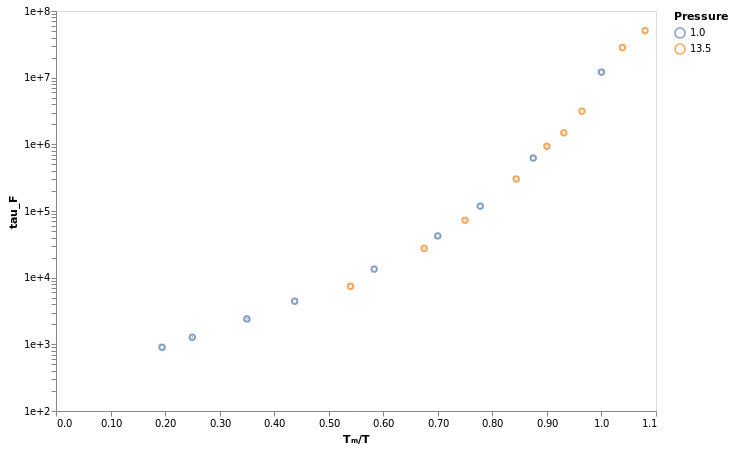

In [53]:
plot_relaxations(mol_df, "tau_F")

/home/malcolm/.miniconda/envs/dynamics/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


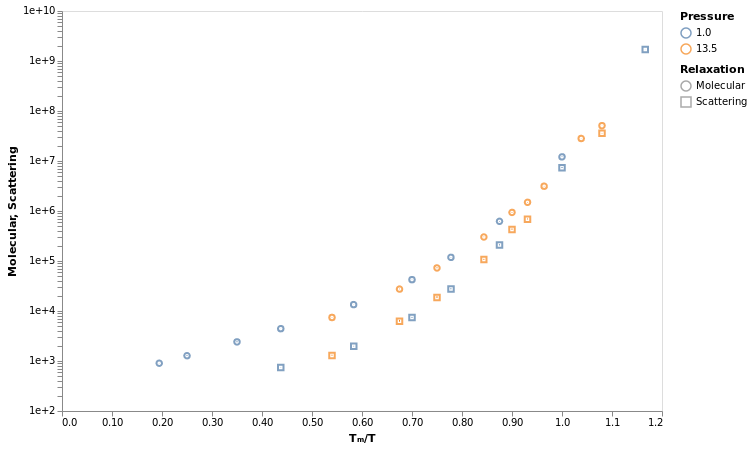

In [54]:
(
    plot_multi_relaxations(melt_df, "tau_F", title="Molecular") +
    plot_multi_relaxations(melt_df, "scattering_function", title="Scattering")
)